In [50]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [51]:
def kernel_matrix(kernel, support):
    shifted_supports = np.outer(np.ones(N), support) - np.outer(support, np.ones(N))
    return kernel.eval(shifted_supports).real

In [52]:
fc = 30
min_separation = 0.40 / fc
N = int(0.5 / min_separation)

# kernel = trig_poly.TrigPoly.multi_dirichlet(fc, [2.0])
kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.uniform_supports(N, min_separation=min_separation)

K0 = kernel_matrix(kernel, support)
K1 = kernel_matrix(kernel.derivative(), support)
K2 = kernel_matrix(kernel.derivative().derivative(), support)

In [53]:
print 'Desired min separation:', min_separation
print 'Actual min separation: ', np.min(support[1:] - support[:-1])

Desired min separation: 0.0133333333333
Actual min separation:  0.0139481364286


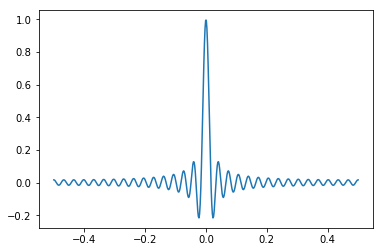

In [54]:
xs = np.linspace(-0.5, 0.5, 500)
plt.plot(xs, kernel(xs))

In [55]:
alphas = np.zeros((N, N))
for k in range(N):
    target = np.zeros(N)
    target[k] = 1.0
    alphas[:, k] = np.linalg.solve(K0 - np.outer(K1[:, k], K1[:, k]) / K2[0, 0], target)
    
betas = np.zeros(N)
for k in range(N):
    target = np.zeros(N)
    betas[k] = 0.0
    for j in range(N):
        betas[k] += alphas[j,k]*K1[j,k]
    betas[k] = -betas[k]/K2[0,0] 

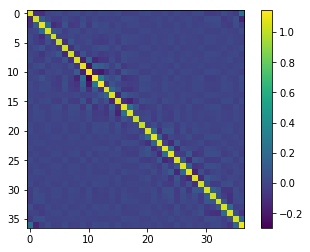

In [56]:
plt.imshow(alphas)
plt.colorbar()

In [57]:
# Retrieve polynomial component per dimension
qs = []
for k in range(N):
    components = [
        (kernel.shift(-support[j]) + kernel.derivative().shift(-support[k]) * (K1[j, k] * (-1.0 / K2[0, 0]))) * alphas[j, k]
        for j in range(N)]
    qs.append(sum(components, trig_poly.TrigPoly.zero()))

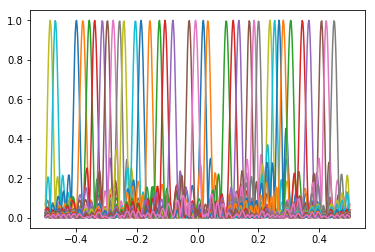

In [58]:
# Check that interpolation problem is solved
xs = np.linspace(-0.5, 0.5, 500)
for i in range(N):
    plt.plot(xs, np.absolute(qs[i](xs)))

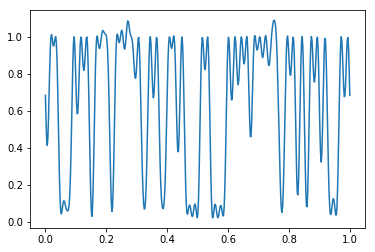

In [59]:
# Check that interpolation problem is solved
xs = np.linspace(0.0, 1.0, 500)
plt.plot(xs, sum([np.absolute(qs[i](xs)) ** 2 for i in range(N)]))

In [66]:
list(enumerate(support))

[(0, 0.018657284608852878),
 (1, 0.03390747015384199),
 (2, 0.094101986493536849),
 (3, 0.11690321157927563),
 (4, 0.13545607581166316),
 (5, 0.17008313288816468),
 (6, 0.18573792116337054),
 (7, 0.20034509318307536),
 (8, 0.23765192247620653),
 (9, 0.25305401332626426),
 (10, 0.26768778162086271),
 (11, 0.28163591804947086),
 (12, 0.30594915044157961),
 (13, 0.34431659806780884),
 (14, 0.36543485332675102),
 (15, 0.40705831858811659),
 (16, 0.4225774379391759),
 (17, 0.44865220288279972),
 (18, 0.51581940516285962),
 (19, 0.53271766385798136),
 (20, 0.60171878544632351),
 (21, 0.62311680711453077),
 (22, 0.64411199306737077),
 (23, 0.66172310280347413),
 (24, 0.68711917239835429),
 (25, 0.70356688288124059),
 (26, 0.72272093998363662),
 (27, 0.74358312814994687),
 (28, 0.75769899429394072),
 (29, 0.79563884933186957),
 (30, 0.81422245740886634),
 (31, 0.84336609092593073),
 (32, 0.87433376374889205),
 (33, 0.89298818987121464),
 (34, 0.91877075581280354),
 (35, 0.97232109157127944),
 

In [60]:
Norm = sum([qk * qk.conjugate() for qk in qs], trig_poly.TrigPoly.zero()) * 0.5
Norm1 = Norm.derivative()
Norm2 = Norm1.derivative()

In [61]:
support

array([ 0.01865728,  0.03390747,  0.09410199,  0.11690321,  0.13545608,
        0.17008313,  0.18573792,  0.20034509,  0.23765192,  0.25305401,
        0.26768778,  0.28163592,  0.30594915,  0.3443166 ,  0.36543485,
        0.40705832,  0.42257744,  0.4486522 ,  0.51581941,  0.53271766,
        0.60171879,  0.62311681,  0.64411199,  0.6617231 ,  0.68711917,
        0.70356688,  0.72272094,  0.74358313,  0.75769899,  0.79563885,
        0.81422246,  0.84336609,  0.87433376,  0.89298819,  0.91877076,
        0.97232109,  0.99330372])

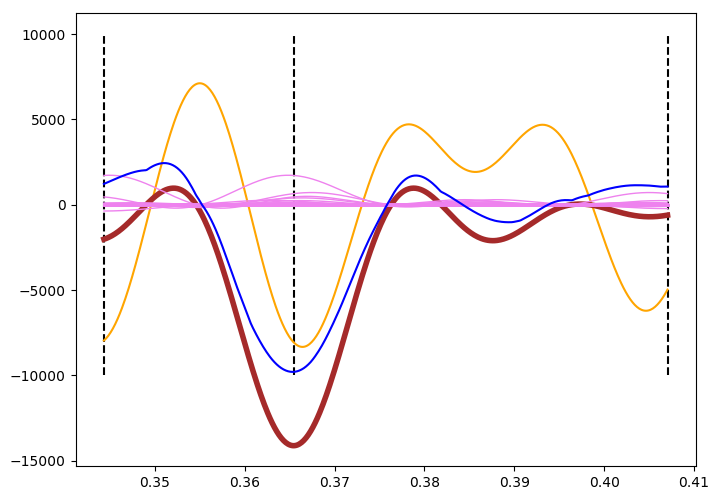

In [71]:
support_pt_k = 14
support_pt = support[support_pt_k]
eps = min_separation
xs = np.linspace(support[support_pt_k - 1], support[support_pt_k + 1], 500)
plt.figure(figsize=(8,6), dpi=100)

for k in range(N):
    first_term_k = (qs[k].conjugate() * qs[k].derivative().derivative())(xs).real
    color = ('red' if k == support_pt_k else 'blue')
    # plt.plot(xs, first_term_k, c=color)
    
for k in range(N):
    second_term_k = (qs[k].derivative() * qs[k].derivative().conjugate())(xs)
    # plt.plot(xs, second_term_k, c='green')
    
plt.plot(xs, Norm2(xs), c='orange')
   
main_expanded_term = (
    kernel.shift(-support_pt) * 
    kernel.derivative().derivative().shift(-support_pt) * 
    np.absolute(alphas[support_pt_k, support_pt_k]) ** 2)
plt.plot(
    xs, 
    main_expanded_term(xs),
    c='brown', linewidth=4.0)
    
first_cross_terms = []
for j in range(N):
    for ell in range(N):
        if j == support_pt_k and ell == support_pt_k:
            continue
        
        first_cross_terms.append(
            kernel.shift(-support[j]) * 
            kernel.derivative().derivative().shift(-support[ell]) * 
            alphas[support_pt_k, j] * np.conj(alphas[support_pt_k, ell]))
        plt.plot(
            xs, 
            first_cross_terms[-1](xs).real,
            c='violet', linewidth=1.0)

# plt.plot(
#     xs,
#     (main_expanded_term + sum(first_cross_terms, trig_poly.TrigPoly.zero()))(xs).real,
#     c='green')

plt.plot(
    xs,
    main_expanded_term(xs) + sum([np.absolute(t(xs).real) for t in first_cross_terms]),
    c='blue')
        
plt.gca().vlines(support[support_pt_k - 1:support_pt_k + 2], -10000, 10000, color='black', linestyles='dashed')

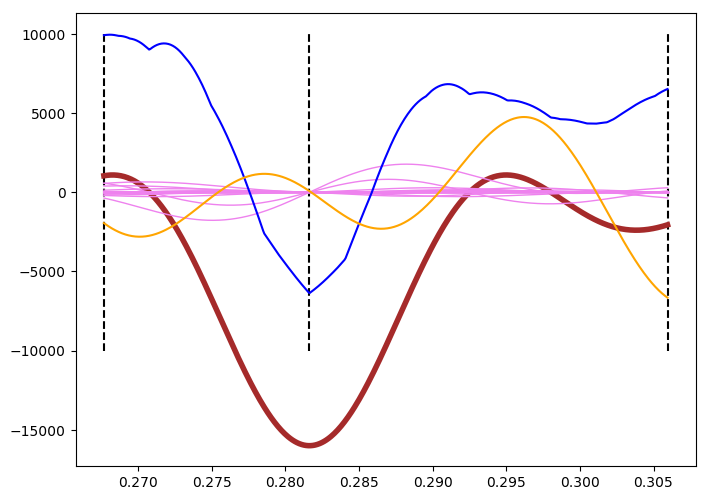

In [70]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(
    xs, 
    main_expanded_term(xs),
    c='brown', linewidth=4.0)

second_cross_terms = []

for j in range(N):
    second_cross_terms.append(
        kernel.shift(-support[j]) * 
        alphas[support_pt_k, j] *
        np.conj(betas[support_pt_k])*
        kernel.derivative().derivative().derivative().shift(-support_pt))
    plt.plot(
        xs, 
        second_cross_terms[-1](xs).real,
        c='violet', linewidth=1.0)
for j in range(N):
    second_cross_terms.append(
        kernel.derivative().derivative().shift(-support[j]) * 
        np.conj(alphas[support_pt_k, j]) *
        betas[support_pt_k]*
        kernel.derivative().shift(-support_pt))
    plt.plot(
        xs, 
        second_cross_terms[-1](xs).real,
        c='violet', linewidth=1.0)

second_cross_terms.append(
kernel.derivative().derivative(). derivative().shift(-support_pt) * 
    np.conj(betas[support_pt_k]) *
    betas[support_pt_k]*
    kernel.derivative().shift(-support_pt))
plt.plot(
    xs, 
    second_cross_terms[-1](xs).real,
    c='violet', linewidth=1.0)

    
plt.plot(
    xs,
    main_expanded_term(xs) + sum([np.absolute(t(xs).real) for t in second_cross_terms])+
    sum([np.absolute(t(xs).real) for t in first_cross_terms]) ,
    c='blue')

plt.gca().vlines(support[support_pt_k - 1:support_pt_k + 2], -10000, 10000, color='black', linestyles='dashed')
plt.plot(xs, Norm2(xs), c='orange')

